## Gradient Descent

```
- 
- 

```

In [1]:
# Built-in library
from typing import Any, Optional, Sequence, Union

# Standard imports
import numpy as np
import torch
import pandas as pd
import matplotlib.pyplot as plt

# Black code formatter (Optional)
%load_ext lab_black
# auto reload imports
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats("svg")

In [3]:
def function(x: float) -> float:
    """This returns the computed value of the function."""
    return 3 * x**2 - 3 * x + 4


def derivative(x: float) -> float:
    """This returns the computed derivative."""
    return 6 * x - 3

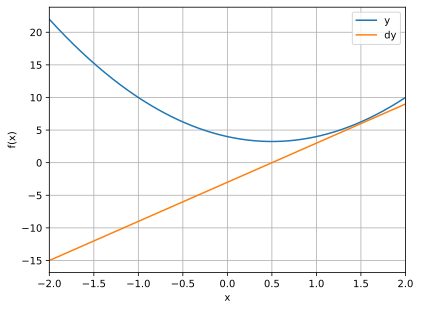

In [4]:
# Plot the function and the derivative
x = np.linspace(-2, 2, 2001)

plt.plot(x, function(x), x, derivative(x))
plt.xlim(x[[0, -1]])  # Select the start and end index [0, -1]
plt.grid()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend(["y", "dy"])
plt.show()

### Gradient Descent Algorithm

```
- Start at a random minima.
```

In [5]:
# Random starting minima
local_minima = np.random.choice(x, 1)
local_minima

array([1.14])

In [6]:
print(local_minima)

# Learning Parameters
learning_rate, training_epochs = 0.01, 100

# Training
for _ in range(training_epochs):
    grad = derivative(local_minima)
    # Update
    local_minima -= learning_rate * grad

# Final local minima
# Given that calculus was used to perform the actual calculation,
# the expected outcome should be 0.5.
local_minima

[1.14]


array([0.50131512])

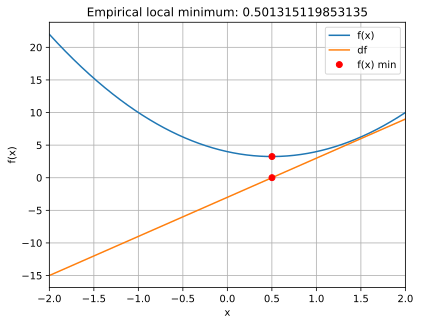

In [7]:
# Visualize the results
plt.plot(x, function(x), x, derivative(x))
plt.plot(local_minima, derivative(local_minima), "ro")
plt.plot(local_minima, function(local_minima), "ro")

plt.xlim(x[[0, -1]])
plt.grid()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend(["f(x)", "df", "f(x) min"])
plt.title(f"Empirical local minimum: {local_minima[0]}")
plt.show()

#### Store The Calculations

In [8]:
# Random starting point
local_minima = np.random.choice(x, 1)

# Learning parameters
learning_rate = 0.01
training_epochs = 100

# Run through training and store all the results
model_params = np.zeros((training_epochs, 2))
for idx in range(training_epochs):
    grad = derivative(local_minima)
    local_minima -= learning_rate * grad
    model_params[idx, 0] = local_minima
    model_params[idx, 1] = grad

In [9]:
model_params[:5]

array([[ -1.6338    , -13.62      ],
       [ -1.505772  , -12.8028    ],
       [ -1.38542568, -12.034632  ],
       [ -1.27230014, -11.31255408],
       [ -1.16596213, -10.63380084]])

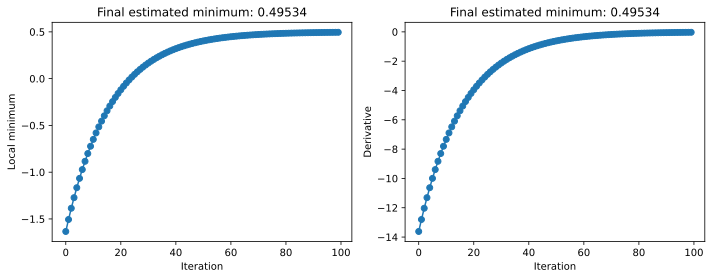

In [10]:
# Visualisation
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

for i in range(2):
    ax[i].plot(model_params[:, i], "o-")
    ax[i].set_xlabel("Iteration")
    ax[i].set_title(f"Final estimated minimum: {local_minima[0]:.5f}")

ax[0].set_ylabel("Local minimum")
ax[1].set_ylabel("Derivative")

plt.tight_layout()
plt.show()

### Observation

```
- The gradient is dropping on every iteration. i.e the gradient is approaching the global minima (calculated using calculus) on every iteration.
```

# Exercise

```
1) Most often in DL, the model trains for a set number of iterations, which is what we do here. But there are other ways of defining how long the training lasts. Modify the code so that training ends when the derivative i smaller than  some threshold, e.g., 0.1. Make sure your code is robust for negative derivatives.

2) Does this change to the code produce a more accurate result? What if you change the stopping threshold?

3) Can you think of any potential problems that might arise when the stopping criterion is based on the derivative instead of a specified number of training epochs?

```

In [11]:
# QS 1
# Random starting point
local_minima = np.random.choice(x, 1)
THRESH = 0.1
print(f"Random starting minima: {local_minima}")

# Learning parameters
learning_rate = 0.01
training_epochs = 100

# Run through training and store all the results
model_params = np.zeros((training_epochs, 2))
for idx in range(training_epochs):
    grad = derivative(local_minima)
    local_minima -= learning_rate * grad
    model_params[idx, 0] = local_minima
    model_params[idx, 1] = grad

    if np.abs(grad) < THRESH:
        break

print(f"num_iters: {idx}\n")

Random starting minima: [-1.594]
num_iters: 79



In [12]:
idxs = np.where(model_params != 0)[0]

# Select the non-zero values
non_zero_model_params = model_params[list(set(idxs))]

non_zero_model_params.shape, model_params.shape

((80, 2), (100, 2))

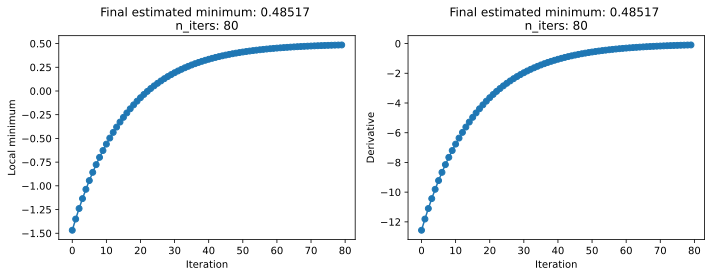

In [13]:
# Visualisation
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

for i in range(2):
    ax[i].plot(non_zero_model_params[:, i], "o-")
    ax[i].set_xlabel("Iteration")
    ax[i].set_title(
        f"Final estimated minimum: {local_minima[0]:.5f} \nn_iters: {non_zero_model_params.shape[0]}"
    )

ax[0].set_ylabel("Local minimum")
ax[1].set_ylabel("Derivative")

plt.tight_layout()
plt.show()

In [14]:
def grad_descent(
    thresh: float, learning_rate: float = 0.01, training_epochs: int = 100
) -> None:
    """This is an empirical form of gradient descent."""

    # Random starting point
    local_minima = np.random.choice(x, 1)
    THRESH = thresh
    print(f"Random starting minima: {local_minima[0]}")

    # Run through training and store all the results
    model_params = np.zeros((training_epochs, 2))
    for idx in range(training_epochs):
        grad = derivative(local_minima)
        local_minima -= learning_rate * grad
        model_params[idx, 0] = local_minima
        model_params[idx, 1] = grad

        if np.abs(grad) < THRESH:
            break

    print(f"num_iters: {idx+1}\n")

    idxs = np.where(model_params != 0)[0]
    # Select the non-zero values
    non_zero_model_params = model_params[list(set(idxs))]

    # Visualisation
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))

    for i in range(2):
        ax[i].plot(non_zero_model_params[:, i], "o-")
        ax[i].set_xlabel("Iteration")
        ax[i].set_title(
            f"Final estimated minimum: {local_minima[0]:.5f} \nn_iters: {non_zero_model_params.shape[0]}"
        )

    ax[0].set_ylabel("Local minimum")
    ax[1].set_ylabel("Derivative")

    plt.tight_layout()
    plt.show()

Random starting minima: 1.158
num_iters: 61



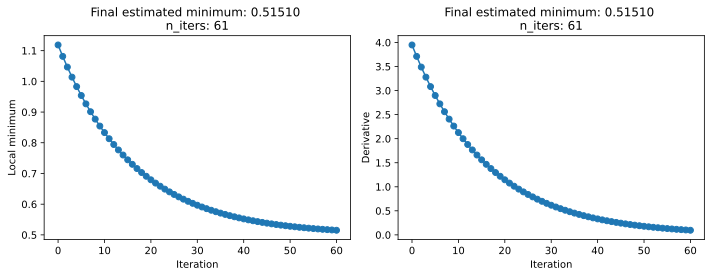

In [15]:
grad_descent(thresh=0.1)

Random starting minima: 0.5619999999999998
num_iters: 5



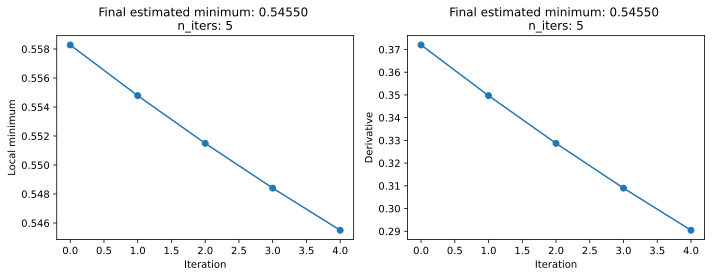

In [16]:
# 2) Does this change to the code produce a more accurate result?
# What if you change the stopping threshold?

grad_descent(thresh=0.3)

### Compute Gradient Descent of:

$$f(x) = cos(2 \pi{x}) + x^2, \;\; x \in \{-2, 2\} $$

In [17]:
import sympy as sym

x_, pi = sym.symbols("x"), sym.pi
fx = sym.cos(2 * pi * x_) + x_**2
df = sym.diff(fx)

display(fx)
display(df)

x**2 + cos(2*pi*x)

2*x - 2*pi*sin(2*pi*x)

In [18]:
def function(x: float) -> float:
    """This returns the computed value of the function."""
    return np.cos(2 * np.pi * x) + np.square(x)


def derivative(x: float) -> float:
    """This returns the computed derivative."""
    return 2 * x - 2 * np.pi * np.sin(2 * np.pi * x)


def plot_func_deriv() -> None:
    """This plots the function and the derivative."""
    # Plot the function and the derivative
    x = np.linspace(-2, 2, 2001)

    plt.plot(x, function(x), x, derivative(x))
    plt.xlim(x[[0, -1]])  # Select the start and end index [0, -1]
    plt.grid()
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend(["fx", "df"])
    plt.show()


def plot_local_minima(learning_rate: float = 0.01, training_epochs: int = 100) -> None:
    """this plots the local minima."""
    # Random starting minima
    local_minima = np.random.choice(x, 1)
    print(local_minima)

    # Training
    for _ in range(training_epochs):
        grad = derivative(local_minima)
        # Update
        local_minima -= learning_rate * grad

    # Visualize the results
    plt.plot(x, function(x), x, derivative(x))
    plt.plot(local_minima, derivative(local_minima), "ro")
    plt.plot(local_minima, function(local_minima), "ro")

    plt.xlim(x[[0, -1]])
    plt.grid()
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend(["f(x)", "df", "f(x) min"])
    plt.title(f"Empirical local minimum: {local_minima[0]}")
    plt.show()


def grad_descent(learning_rate: float = 0.01, training_epochs: int = 100) -> None:
    """This is an empirical form of gradient descent."""

    # Random starting point
    local_minima = np.random.choice(x, 1)
    print(f"Random starting minima: {local_minima[0]}")

    # Run through training and store all the results
    model_params = np.zeros((training_epochs, 2))
    for idx in range(training_epochs):
        grad = derivative(local_minima)
        local_minima -= learning_rate * grad
        model_params[idx, 0] = local_minima
        model_params[idx, 1] = grad

    print(f"num_iters: {idx+1}\n")

    idxs = np.where(model_params != 0)[0]
    # Select the non-zero values
    non_zero_model_params = model_params[list(set(idxs))]

    # Visualisation
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))

    for i in range(2):
        ax[i].plot(non_zero_model_params[:, i], "o-")
        ax[i].set_xlabel("Iteration")
        ax[i].set_title(
            f"Final estimated minimum: {local_minima[0]:.5f} \nn_iters: {non_zero_model_params.shape[0]}"
        )

    ax[0].set_ylabel("Local minimum")
    ax[1].set_ylabel("Derivative")

    plt.tight_layout()
    plt.show()

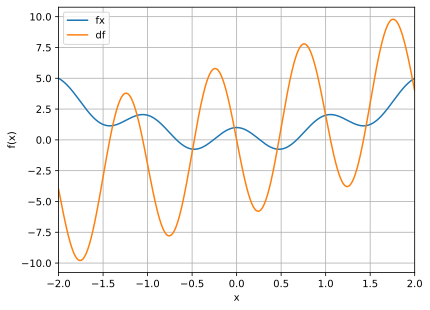

In [19]:
plot_func_deriv()

[1.964]


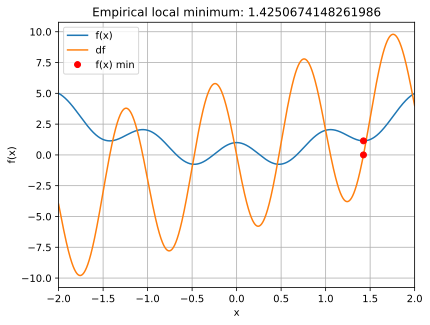

In [20]:
plot_local_minima(learning_rate=0.01, training_epochs=2_000)

### Observations

```
- The global minima: approx. +-0.48
- The local minima: approx. +-1.5
```

Random starting minima: -0.8719999999999999
num_iters: 100



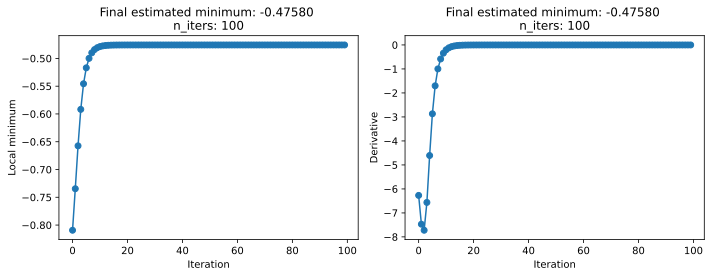

In [21]:
x = np.linspace(-2, 2, 2001)

grad_descent()